In [1]:
%load_ext autoreload
%autoreload 2
import copy

In [2]:
# Initialize nodes

graph_main = {
    0: {1: 1, 2: 3, 3: 3},
    1: {0: 1, 2: 1, 4: 4, 5: 2},
    2: {0: 3, 1: 1, 3: 1, 4: 1, 5: 1, 6: 2},
    3: {0: 3, 2: 1, 5: 2, 6: 3, 7: 1},
    4: {2: 1, 8: 2},
    5: {2: 1, 3: 2, 8: 1, 9: 7},
    6: {2: 2, 3: 3, 8: 3, 9: 2},
    7: {3: 1, 9: 4},
    8: {4: 2, 5: 1, 6: 3},
    9: {5: 7, 6: 2, 7: 4}
}
node_positions = {
    0: (0, 0),
    1: (3, 3),
    2: (3, 0),
    3: (3, -3),
    4: (6, 3),
    5: (6, 0),
    6: (6, -3),
    7: (6, -6),
    8: (9, 0),
    9: (9, -6),
}

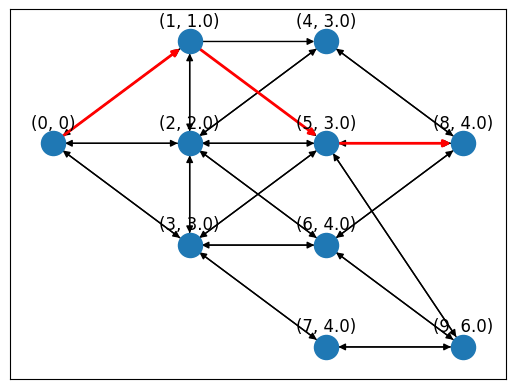

The shortest distance from node 0 to node 8 is 4.0
And this is the path: [0, 1, 5, 8]


In [56]:
# find the shortest path.

from ShortestPath_V0 import ShortestPath

graph = copy.deepcopy(graph_main)

start_node = 0
target_node = 8
model = ShortestPath()
distance, path = model.fit(graph, start_node, target_node)

model.graph_plotting(given_path=path, pos=node_positions)
print(f"The shortest distance from node {start_node} to node {target_node} is {distance}")
print(f"And this is the path: {path}")

In [58]:
# find the shortest path for the scenario 2.
from ShortestPath_V1 import ShortestPath

graph = copy.deepcopy(graph_main)

start_node = 0
target_node = 8

model = ShortestPath()
model.fit_flow(graph_=graph, pos=node_positions, start=start_node, target=target_node, flow=100, step=20)

4.0 [0, 1, 5, 8]
5.5 [0, 1, 2, 4, 8]
6.5 [0, 2, 5, 8]
7.25 [0, 3, 5, 8]
8.25 [0, 1, 2, 4, 8]


# Part 2

In [5]:
# Load data and prepare it for our functions

from Dataloader import Dataloader
from ShortestPath_V2 import ShortestPath
import pandas as pd

data = pd.read_csv("Network/Network.txt")
data = data.iloc[:, :]
dataloader = Dataloader(data=data)
dataloader.dict

0it [00:00, ?it/s]

OrderedDict([(0, {1: 376, 2: 486, 29: 401}),
             (1, {0: 298, 23: 249, 32: 145}),
             (2, {0: 320, 26: 299, 34: 189}),
             (3, {4: 438, 7: 269, 40: 537}),
             (4, {3: 128, 18: 70, 19: 63}),
             (5, {6: 280, 7: 558, 10: 568}),
             (6, {5: 434, 11: 81, 19: 395}),
             (7, {3: 456, 5: 480, 16: 335, 17: 441}),
             (8, {9: 367, 10: 462, 47: 554}),
             (9, {8: 421, 11: 353, 20: 357}),
             (10, {5: 495, 8: 277, 11: 373}),
             (11, {6: 568, 9: 521, 10: 137}),
             (12, {13: 62, 174: 187, 1889: 72}),
             (13, {12: 517, 22: 517, 23: 200}),
             (14, {15: 461, 25: 562, 4730: 195}),
             (15, {14: 398, 4666: 235, 4697: 60}),
             (16, {7: 537, 40: 334, 47: 205}),
             (17, {7: 38, 19: 412}),
             (18, {4: 317, 179: 514}),
             (19, {4: 542, 6: 35, 17: 33}),
             (20, {9: 518, 21: 212}),
             (21, {20: 245, 22: 270}),
    

In [7]:
# find the shortest path
source_node = 3859
sink_node = 11
model = ShortestPath() #12275 ITER
model.fit_flow(graph_=dataloader.dict, start=source_node, target=sink_node, flow=8000, step=1000)

  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/12275 [00:00<?, ?it/s]

  0%|          | 0/12275 [00:00<?, ?it/s]

  0%|          | 0/12275 [00:00<?, ?it/s]

  0%|          | 0/12275 [00:00<?, ?it/s]

  0%|          | 0/12275 [00:00<?, ?it/s]

  0%|          | 0/12275 [00:00<?, ?it/s]

  0%|          | 0/12275 [00:00<?, ?it/s]

  0%|          | 0/12275 [00:00<?, ?it/s]

In [38]:
# If we don't want to run everything from the top we can import the results which was produced before.
results = pd.read_csv("results/result-whole-run.csv")
results = results.iloc[:, 1:]

# or we can run everything from the first:)
# results = model.results

a = results.iloc[75, 0]

### Find the total travel time in veh*hr

In [29]:
# calculate total travel time:
total_travel_time = sum(list(map(float, results.columns))) # 8000veh*sec
total_travel_time = total_travel_time/8000 # veh*sec
total_travel_time = total_travel_time*3600 # veh*hr
total_travel_time

60348.26068024372

### The order of shortest paths

In [42]:
import numpy as np
for i in range(len(results.columns)):
    print(f"at the {i+1}th round: ", end="")
    for j in list(results.iloc[:, i]):
        if not np.isnan(j):
            print(f"{j}, ", end="")
    print()

at the 1th round: 3859.0, 3864.0, 4140.0, 11124.0, 11123.0, 4016.0, 3870.0, 3868.0, 3866.0, 4090.0, 3887.0, 3603.0, 3602.0, 3564.0, 3562.0, 3563.0, 3611.0, 3615.0, 3617.0, 3613.0, 3549.0, 3543.0, 3540.0, 3541.0, 3597.0, 3551.0, 3496.0, 3497.0, 3664.0, 3593.0, 3587.0, 3582.0, 1859.0, 1854.0, 1851.0, 1749.0, 1720.0, 164.0, 180.0, 183.0, 1866.0, 1680.0, 1671.0, 1661.0, 1662.0, 1644.0, 99.0, 84.0, 1608.0, 70.0, 1593.0, 1585.0, 52.0, 51.0, 54.0, 55.0, 48.0, 49.0, 175.0, 179.0, 18.0, 4.0, 19.0, 6.0, 11.0, 
at the 2th round: 3859.0, 3864.0, 4140.0, 11124.0, 11123.0, 4016.0, 3870.0, 3868.0, 3866.0, 4090.0, 3887.0, 3603.0, 3602.0, 3564.0, 3562.0, 3563.0, 3611.0, 3615.0, 3617.0, 3613.0, 3549.0, 3543.0, 3540.0, 3541.0, 3597.0, 3551.0, 3496.0, 3497.0, 3664.0, 3593.0, 3587.0, 3582.0, 1859.0, 1854.0, 1851.0, 1749.0, 1720.0, 164.0, 180.0, 183.0, 1866.0, 1680.0, 1671.0, 1661.0, 1662.0, 1644.0, 99.0, 84.0, 1608.0, 70.0, 1593.0, 1585.0, 52.0, 51.0, 54.0, 55.0, 48.0, 49.0, 175.0, 179.0, 18.0, 4.0, 19.0, 

### Number of nodes in paths

In [43]:
for i in range(len(results.columns)):
    num = 0
    for j in list(results.iloc[:, i]):
        if not np.isnan(j):
            num += 1
    print(f"in the {i+1}th path the number of nodes is: {num}")

in the 1th path the number of nodes is: 65
in the 2th path the number of nodes is: 65
in the 3th path the number of nodes is: 66
in the 4th path the number of nodes is: 66
in the 5th path the number of nodes is: 64
in the 6th path the number of nodes is: 76
in the 7th path the number of nodes is: 68
in the 8th path the number of nodes is: 64
